# Course: MSIS-678 Knowledge Discovery & Data Warehousing
# Data Science Using Python And R Exercise
#Professor: Edward (Ted) Kreutzer

#Student: Jun Bao

## CHAPTER 10 CLUSTERING

For the following exercises, work with the cereals data set. Use either Python or R to solve each problem.

15. Subset the Fat and Sodium variables into their own dataframe,X.Standardize the data set.

In [1]:
# import the libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
import sklearn.metrics as met
import matplotlib.pyplot as plt

In [2]:
# import the data set
cereal = pd.read_csv('cereals.csv')
# take a look of the two columns' values and make sense of them
cereal[['Fat', 'Sodium']]

,Fat,Sodium
0,1,130
1,5,15
2,1,260
3,0,140
4,2,200
...,...,...
72,1,250
73,1,140
74,1,230
75,1,200


In [3]:
# standardize the predictor variables and convert into dataframe format
xz = pd.DataFrame(stats.zscore(cereal[['Fat', 'Sodium']]), columns=['Fat', 'Sodium'])
xz

,Fat,Sodium
0,-0.012988,-0.356306
1,3.987349,-1.737087
2,-0.012988,1.204578
3,-1.013072,-0.236238
4,0.987096,0.484170
...,...,...
72,-0.012988,1.084510
73,-0.012988,-0.236238
74,-0.012988,0.844374
75,-0.012988,0.484170


16. Run k‐means clustering on the data set, using three clusters.

In [4]:
# run the k-means algorithm
kmeans = KMeans(n_clusters=3).fit(xz)

17. Obtain the summary of each variable within each cluster and use the summaries to identify:
a. A low fat, low sodium cluster.

In [5]:
# save the cluster membership information as its own object
cluster = kmeans.labels_
# seperate the records into 3 groups based on the cluster membership information
cluster1 = xz.loc[cluster==0]
cluster2 = xz.loc[cluster==1]
cluster3 = xz.loc[cluster==2]
# summarize the 3 clusters
cluster1.describe(), cluster2.describe(), cluster3.describe()


(             Fat     Sodium
 count  44.000000  44.000000
 mean   -0.376655   0.500543
 std     0.486648   0.596188
 min    -1.013072  -0.416340
 25%    -1.013072   0.123966
 50%    -0.012988   0.484170
 75%    -0.012988   0.874391
 max    -0.012988   1.924986,
              Fat     Sodium
 count  19.000000  19.000000
 mean    1.408184   0.063932
 std     0.768598   0.739608
 min     0.987096  -1.737087
 25%     0.987096  -0.236238
 50%     0.987096   0.003898
 75%     1.987181   0.604238
 max     3.987349   1.564782,
              Fat     Sodium
 count  14.000000  14.000000
 mean   -0.727334  -1.659901
 std     0.611301   0.410850
 min    -1.013072  -1.917189
 25%    -1.013072  -1.917189
 50%    -1.013072  -1.917189
 75%    -1.013072  -1.466934
 max     0.987096  -0.836578)

In [6]:
'''The low fat, low sodium cluster is cluster3.'''

'The low fat, low sodium cluster is cluster3.'

b. A low fat, high sodium cluster.

In [7]:
'''The low fat, high sodium cluster is cluster1.'''

'The low fat, high sodium cluster is cluster1.'

c. A high fat, high sodium cluster.

In [8]:
'''The high fat, high sodium cluster is cluster2'''

'The high fat, high sodium cluster is cluster2'

For the following exercises, work with the Framingham_training and Framingham_test data sets. Use only the Sex and Age fields. Standardize Age.

18. Run k‐means clustering on the Framingham_training data set, requesting k = 2 clusters.

In [9]:
# import the data set
fram_tr = pd.read_csv('framingham_nb_training.csv')
fram_tr

,Sex,Educ,Death
0,2,3,0
1,2,2,0
2,1,1,0
3,2,1,0
4,2,1,0
...,...,...,...
995,2,1,1
996,2,2,1
997,1,1,1
998,2,2,1


In [10]:
# convert the variables into a standadrized data set and convert them into dataframe
xz_fram_tr = pd.DataFrame(stats.zscore(fram_tr), columns=['Sex', 'Educ', 'Death'])
xz_fram_tr

,Sex,Educ,Death
0,0.984126,1.110023,-1.105542
1,0.984126,0.106386,-1.105542
2,-1.016130,-0.897252,-1.105542
3,0.984126,-0.897252,-1.105542
4,0.984126,-0.897252,-1.105542
...,...,...,...
995,0.984126,-0.897252,0.904534
996,0.984126,0.106386,0.904534
997,-1.016130,-0.897252,0.904534
998,0.984126,0.106386,0.904534


In [11]:
# run the k-means algothrim
kmeans_fram_tr = KMeans(n_clusters=2).fit(xz_fram_tr)
# cluster membership
cluster_fram_tr = kmeans_fram_tr.labels_
# seperate the records based on cluster membership
cluster_fram_tr1 = xz_fram_tr.loc[cluster_fram_tr==0]
cluster_fram_tr2 = xz_fram_tr.loc[cluster_fram_tr==1]
cluster_fram_tr1, cluster_fram_tr2

(          Sex      Educ     Death
 0    0.984126  1.110023 -1.105542
 1    0.984126  0.106386 -1.105542
 2   -1.016130 -0.897252 -1.105542
 3    0.984126 -0.897252 -1.105542
 4    0.984126 -0.897252 -1.105542
 ..        ...       ...       ...
 445 -1.016130  0.106386 -1.105542
 446  0.984126 -0.897252 -1.105542
 447 -1.016130  0.106386 -1.105542
 448 -1.016130  0.106386 -1.105542
 449  0.984126  0.106386 -1.105542
 
 [450 rows x 3 columns],
           Sex      Educ     Death
 450 -1.016130 -0.897252  0.904534
 451 -1.016130  0.106386  0.904534
 452  0.984126  0.106386  0.904534
 453 -1.016130  0.106386  0.904534
 454 -1.016130  0.106386  0.904534
 ..        ...       ...       ...
 995  0.984126 -0.897252  0.904534
 996  0.984126  0.106386  0.904534
 997 -1.016130 -0.897252  0.904534
 998  0.984126  0.106386  0.904534
 999  0.984126  0.106386  0.904534
 
 [550 rows x 3 columns])

19. Construct a table of statistics summarizing your clusters. Describe what these two clus- ters consist of.

In [12]:
cluster_fram_tr1.describe()

,Sex,Educ,Death
count,450.000000,450.000000,4.500000e+02
mean,0.166244,0.117537,-1.105542e+00
std,0.984478,0.999095,8.002502e-15
min,-1.016130,-0.897252,-1.105542e+00
25%,-1.016130,-0.897252,-1.105542e+00
50%,0.984126,0.106386,-1.105542e+00
75%,0.984126,1.110023,-1.105542e+00
max,0.984126,2.113661,-1.105542e+00


In [13]:
cluster_fram_tr2.describe()

,Sex,Educ,Death
count,550.000000,550.000000,5.500000e+02
mean,-0.136017,-0.096167,9.045340e-01
std,0.993805,0.992237,5.222798e-15
min,-1.016130,-0.897252,9.045340e-01
25%,-1.016130,-0.897252,9.045340e-01
50%,-1.016130,-0.897252,9.045340e-01
75%,0.984126,0.106386,9.045340e-01
max,0.984126,2.113661,9.045340e-01


In [14]:
'''The statistics summarize the count, mean, standard diviation, minimum record, 25% percentile record, 50% percentile record, 75% percentile record, and maximum record of each cluster.'''

'The statistics summarize the count, mean, standard diviation, minimum record, 25% percentile record, 50% percentile record, 75% percentile record, and maximum record of each cluster.'

20. Perform k‐means clustering on the Framingham_test data set, requesting k = 2 clusters.

In [15]:
fram_ts = pd.read_csv('framingham_nb_test.csv')
xz_fram_ts = pd.DataFrame(stats.zscore(fram_ts), columns=['Sex', 'Educ', 'Death'])
kmeans_fram_ts = KMeans(n_clusters=2).fit(xz_fram_ts)
cluster_fram_ts = kmeans_fram_ts.labels_
cluster_fram_ts1 = xz_fram_ts.loc[cluster_fram_ts==0]
cluster_fram_ts2 = xz_fram_ts.loc[cluster_fram_ts==1]
cluster_fram_ts1.describe(), cluster_fram_ts2.describe()

(              Sex        Educ         Death
 count  525.000000  525.000000  5.250000e+02
 mean     0.117850    0.176494 -9.511897e-01
 std      0.988253    1.019801  1.333538e-15
 min     -1.049209   -0.926595 -9.511897e-01
 25%     -1.049209   -0.926595 -9.511897e-01
 50%      0.953099    0.015067 -9.511897e-01
 75%      0.953099    0.956728 -9.511897e-01
 max      0.953099    1.898389 -9.511897e-01,
               Sex        Educ         Death
 count  475.000000  475.000000  4.750000e+02
 mean    -0.130255   -0.195073  1.051315e+00
 std      0.998826    0.942004  1.378128e-14
 min     -1.049209   -0.926595  1.051315e+00
 25%     -1.049209   -0.926595  1.051315e+00
 50%     -1.049209   -0.926595  1.051315e+00
 75%      0.953099    0.015067  1.051315e+00
 max      0.953099    1.898389  1.051315e+00)

21. Report the results from your test set. Are your clusters validated?

In [16]:
# the 3 variables' mean value of cluster1 in traing set and the mean value of cluster2 in test set demonstrates similar value.
# So, cluster1 in traning set vs. cluster2 in test set will compared together; 
# and cluster2 in traning set vs. cluster1 in training set will be compared together
# Traing Sex mean in cluster1 - Test Sex mean in cluster2
0.166244 - 0.117850

0.048394000000000006

In [17]:
# Traing Educ mean in cluster1 - Test Educ mean in cluster2
0.117537 - 0.176494

-0.05895700000000001

In [18]:
# Traing Death mean in cluster1 - Test Death mean in cluster2
(-1.105542) - (-0.9511897)

-0.1543523

In [19]:
# Traing Sex mean in cluster2 - Test Sex mean in cluster1
(-0.136017) - (-0.130255)

-0.005761999999999989

In [20]:
# Traing Educ mean in cluster2 - Test Educ mean in cluster1
(-0.096167) - (-0.195073)

0.098906

In [21]:
# Traing Death mean in cluster1 - Test Death mean in cluster2
0.9045340 - 1.051315

-0.14678100000000005

In [22]:
'''The mean values of variables Sex, Educ and Death are relatively small.'''

'The mean values of variables Sex, Educ and Death are relatively small.'

22. Again run k‐means clustering on the Framingham_training data set,this time specifying k = 3 clusters.

In [23]:
# run the k-means algothrim
kmeans_fram_tr_k3 = KMeans(n_clusters=3).fit(xz_fram_tr)
# cluster membership
cluster_fram_tr_k3 = kmeans_fram_tr_k3.labels_
# seperate the records based on cluster membership
cluster_fram_k3_tr1 = xz_fram_tr.loc[cluster_fram_tr_k3==0]
cluster_fram_k3_tr2 = xz_fram_tr.loc[cluster_fram_tr_k3==1]
cluster_fram_k3_tr3 = xz_fram_tr.loc[cluster_fram_tr_k3==2]


23. Construct a table of statistics summarizing your clusters. Describe which records belong to each cluster.

In [24]:
cluster_fram_k3_tr1.describe(), cluster_fram_k3_tr2.describe(), cluster_fram_k3_tr3.describe()

(                Sex        Educ         Death
 count  3.080000e+02  308.000000  3.080000e+02
 mean  -1.016130e+00   -0.076094  9.045340e-01
 std    5.560149e-15    1.049687  4.448119e-15
 min   -1.016130e+00   -0.897252  9.045340e-01
 25%   -1.016130e+00   -0.897252  9.045340e-01
 50%   -1.016130e+00   -0.897252  9.045340e-01
 75%   -1.016130e+00    0.357295  9.045340e-01
 max   -1.016130e+00    2.113661  9.045340e-01,
               Sex        Educ         Death
 count  450.000000  450.000000  4.500000e+02
 mean     0.166244    0.117537 -1.105542e+00
 std      0.984478    0.999095  8.002502e-15
 min     -1.016130   -0.897252 -1.105542e+00
 25%     -1.016130   -0.897252 -1.105542e+00
 50%      0.984126    0.106386 -1.105542e+00
 75%      0.984126    1.110023 -1.105542e+00
 max      0.984126    2.113661 -1.105542e+00,
                 Sex        Educ         Death
 count  2.420000e+02  242.000000  2.420000e+02
 mean   9.841260e-01   -0.121714  9.045340e-01
 std    3.893834e-15    0.915

24. Perform k‐means clustering on the Framingham_test data set, specifying k = 3 clusters.

In [25]:
fram_ts = pd.read_csv('framingham_nb_test.csv')
xz_fram_ts = pd.DataFrame(stats.zscore(fram_ts), columns=['Sex', 'Educ', 'Death'])
kmeans_fram_ts_k3 = KMeans(n_clusters=3).fit(xz_fram_ts)
cluster_fram_ts_k3 = kmeans_fram_ts_k3.labels_
cluster_fram_k3_ts1 = xz_fram_ts.loc[cluster_fram_ts_k3==0]
cluster_fram_k3_ts2 = xz_fram_ts.loc[cluster_fram_ts_k3==1]
cluster_fram_k3_ts3 = xz_fram_ts.loc[cluster_fram_ts_k3==2]


25. Report the results from your test set. Are your clusters validated?

In [26]:
cluster_fram_k3_ts1.describe(), cluster_fram_k3_ts3.describe(), cluster_fram_k3_ts2.describe()

(                Sex        Educ         Death
 count  2.190000e+02  219.000000  2.190000e+02
 mean  -1.049209e+00    0.156961 -9.511897e-01
 std    2.893193e-15    1.067251  1.335320e-15
 min   -1.049209e+00   -0.926595 -9.511897e-01
 25%   -1.049209e+00   -0.926595 -9.511897e-01
 50%   -1.049209e+00    0.015067 -9.511897e-01
 75%   -1.049209e+00    0.956728 -9.511897e-01
 max   -1.049209e+00    1.898389 -9.511897e-01,
               Sex        Educ         Death
 count  475.000000  475.000000  4.750000e+02
 mean    -0.130255   -0.195073  1.051315e+00
 std      0.998826    0.942004  1.378128e-14
 min     -1.049209   -0.926595  1.051315e+00
 25%     -1.049209   -0.926595  1.051315e+00
 50%     -1.049209   -0.926595  1.051315e+00
 75%      0.953099    0.015067  1.051315e+00
 max      0.953099    1.898389  1.051315e+00,
                 Sex        Educ         Death
 count  3.060000e+02  306.000000  3.060000e+02
 mean   9.530986e-01    0.190474 -9.511897e-01
 std    3.558533e-15    0.985

In [27]:
'''Yes, the clusters are validated.'''

'Yes, the clusters are validated.'

26. Run k‐means clustering on the Framingham_training data set. Specify k = 4 clusters.

In [28]:
# run the k-means algothrim
kmeans_fram_tr_k4 = KMeans(n_clusters=4).fit(xz_fram_tr)
# cluster membership
cluster_fram_tr_k4 = kmeans_fram_tr_k4.labels_
# seperate the records based on cluster membership
cluster_fram_k4_tr1 = xz_fram_tr.loc[cluster_fram_tr_k4==0]
cluster_fram_k4_tr2 = xz_fram_tr.loc[cluster_fram_tr_k4==1]
cluster_fram_k4_tr3 = xz_fram_tr.loc[cluster_fram_tr_k4==2]
cluster_fram_k4_tr4 = xz_fram_tr.loc[cluster_fram_tr_k4==3]


27. Construct a table of statistics summarizing your four clusters. Clearly describe your four clusters.

In [29]:
cluster_fram_k4_tr1.describe(), cluster_fram_k4_tr2.describe(), cluster_fram_k4_tr3.describe(), cluster_fram_k4_tr4.describe()

(                Sex        Educ         Death
 count  1.840000e+02  184.000000  1.840000e+02
 mean  -1.016130e+00    0.117295 -1.105542e+00
 std    2.671805e-15    1.054396  2.894456e-15
 min   -1.016130e+00   -0.897252 -1.105542e+00
 25%   -1.016130e+00   -0.897252 -1.105542e+00
 50%   -1.016130e+00    0.106386 -1.105542e+00
 75%   -1.016130e+00    1.110023 -1.105542e+00
 max   -1.016130e+00    2.113661 -1.105542e+00,
                 Sex        Educ         Death
 count  2.420000e+02  242.000000  2.420000e+02
 mean   9.841260e-01   -0.121714  9.045340e-01
 std    3.893834e-15    0.915431  4.116339e-15
 min    9.841260e-01   -0.897252  9.045340e-01
 25%    9.841260e-01   -0.897252  9.045340e-01
 50%    9.841260e-01    0.106386  9.045340e-01
 75%    9.841260e-01    0.106386  9.045340e-01
 max    9.841260e-01    2.113661  9.045340e-01,
                 Sex        Educ         Death
 count  3.080000e+02  308.000000  3.080000e+02
 mean  -1.016130e+00   -0.076094  9.045340e-01
 std    5.5

28. Perform k‐means clustering on the Framingham_test data set, requesting k = 4 clusters.

In [30]:
xz_fram_ts = pd.DataFrame(stats.zscore(fram_ts), columns=['Sex', 'Educ', 'Death'])
kmeans_fram_ts_k4 = KMeans(n_clusters=4).fit(xz_fram_ts)
cluster_fram_ts_k4 = kmeans_fram_ts_k4.labels_
cluster_fram_k4_ts1 = xz_fram_ts.loc[cluster_fram_ts_k4==0]
cluster_fram_k4_ts2 = xz_fram_ts.loc[cluster_fram_ts_k4==1]
cluster_fram_k4_ts3 = xz_fram_ts.loc[cluster_fram_ts_k4==2]
cluster_fram_k4_ts4 = xz_fram_ts.loc[cluster_fram_ts_k4==3]


29. Report the results from your test set. Are your clusters validated?

In [31]:
cluster_fram_k4_ts1.describe(), cluster_fram_k4_ts2.describe(), cluster_fram_k4_ts3.describe(), cluster_fram_k4_ts4.describe()


(                Sex        Educ         Death
 count  3.060000e+02  306.000000  3.060000e+02
 mean   9.530986e-01    0.190474 -9.511897e-01
 std    3.558533e-15    0.985976  1.223246e-15
 min    9.530986e-01   -0.926595 -9.511897e-01
 25%    9.530986e-01   -0.926595 -9.511897e-01
 50%    9.530986e-01    0.015067 -9.511897e-01
 75%    9.530986e-01    0.956728 -9.511897e-01
 max    9.530986e-01    1.898389 -9.511897e-01,
                 Sex        Educ         Death
 count  2.570000e+02  257.000000  2.570000e+02
 mean  -1.049209e+00   -0.153480  1.051315e+00
 std    3.114690e-15    1.018982  1.334867e-15
 min   -1.049209e+00   -0.926595  1.051315e+00
 25%   -1.049209e+00   -0.926595  1.051315e+00
 50%   -1.049209e+00   -0.926595  1.051315e+00
 75%   -1.049209e+00    0.015067  1.051315e+00
 max   -1.049209e+00    1.898389  1.051315e+00,
                 Sex        Educ       Death
 count  2.180000e+02  218.000000  218.000000
 mean   9.530986e-01   -0.244106    1.051315
 std    3.115779e

In [32]:
'''Yes, the clusters are validated.'''

'Yes, the clusters are validated.'

30. Which of the clustering solutions, k = 2, 3, or 4, do you prefer, and why?

In [33]:
 '''The best k should results in minimum total within-cluster variation (or error). By running describe() command, we got the statsitical summary of each cluster. I believe k=3 is the best clustering solustion. Becase the std(standard divation) are the minimum.'''
 

'The best k should results in minimum total within-cluster variation (or error). By running describe() command, we got the statsitical summary of each cluster. I believe k=3 is the best clustering solustion. Becase the std(standard divation) are the minimum.'

## CHAPTER 11 REGRESSION MODELING

For the following exercises, work with the adult data set. Use either Python or R to solve each problem.

25. Partition the data set into a training set and a test set, each containing about half of the records.

In [34]:
# import the data set
adult = pd.read_csv('Adult')
# partition the data set
adult_train, adult_test = train_test_split(adult, test_size=0.5, random_state=7)

adult.shape, adult_train.shape, adult_test.shape, adult_train, len(adult_train)


((25000, 15),
 (12500, 15),
 (12500, 15),
        age         workclass  demogweight     education  education-num  \
 15055   52           Private       224198       HS-grad              9   
 5758    20           Private       165804  Some-college             10   
 17647   41           Private       216968     Bachelors             13   
 16149   40           Private       353432          10th              6   
 19513   50           Private       174102       HS-grad              9   
 ...    ...               ...          ...           ...            ...   
 919     21           Private       186648  Some-college             10   
 20691   36           Private       265881       HS-grad              9   
 5699    23           Private       149224       HS-grad              9   
 10742   37           Private       231180       HS-grad              9   
 16921   27  Self-emp-not-inc       140863           9th              5   
 
            marital-status         occupation   relation

26. Run a regression model to predict Hours per Week using Age and Education Num. Obtain a summary of the model. Are there any predictor variables that should not be in the model?

In [35]:
# separate the predictor variables and the target variable and save into dataframe format
x = pd.DataFrame(adult_train[['age', 'education-num']])
y = pd.DataFrame(adult_train[['hours-per-week']])
# add a constant variable to our predictor variables
x = sm.add_constant(x)
#  run the multiple regression mode
model01 = sm.OLS(y, x).fit()
# obtain the results(summary) of the regression model
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours-per-week   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     150.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           3.33e-65
Time:                        23:25:15   Log-Likelihood:                -49119.
No. Observations:               12500   AIC:                         9.824e+04
Df Residuals:                   12497   BIC:                         9.827e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.3236      0.534     58.707      0.000      30.278      32.369
age               0.0604      0.008      7.515      0.000       0.045       0.076
education-num     0.6552      0.042     15.447      0.000       0.572       0.738
==============================================================================
Omnibus:                      948.519   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4542.064
Skew:                           0.204   Prob(JB):                         0.00
Kurtosis:                       5.925   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
'''There is no predictor variables that should not be in the model, because the p value of these 2 variables is less than 0.05.'''

'There is no predictor variables that should not be in the model, because the p value of these 2 variables is less than 0.05.'

27. Validate the model from the previous exercise.

In [37]:
# To verify the regression model results, we run the same code on the adult_test data set

# separate the predictor variables and the target variable and save into dataframe format
x_test = pd.DataFrame(adult_test[['age', 'education-num']])
y_test = pd.DataFrame(adult_test[['hours-per-week']])
# add a constant variable to our predictor variables
x_test = sm.add_constant(x_test)
#  run the multiple regression mode
model01_test = sm.OLS(y_test, x_test).fit()
# obtain the results(summary) of the regression model
model01_test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours-per-week   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.35e-76
Time:                        23:25:15   Log-Likelihood:                -48763.
No. Observations:               12500   AIC:                         9.753e+04
Df Residuals:                   12497   BIC:                         9.755e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.0673      0.526     59.062      0.000      30.036      32.098
age               0.0551      0.008      7.023      0.000       0.040       0.070
education-num     0.7301      0.043     17.144      0.000       0.647       0.814
==============================================================================
Omnibus:                     1050.613   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5647.349
Skew:                           0.213   Prob(JB):                         0.00
Kurtosis:                       6.265   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
'''The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'''

'The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'

28. Use the regression equation to complete this sentence: “The estimated Hours per Week
equals....”

In [39]:
'''The estimated Hours per Week = 31.3236 + 0.0604(age) + 0.6552(education-num) '''

'The estimated Hours per Week = 31.3236 + 0.0604(age) + 0.6552(education-num) '

29. Interpret the coefficient for Age.

In [40]:
'''If the person is older, the person tend to spend more hours per week.'''

'If the person is older, the person tend to spend more hours per week.'

30. Interpret the coefficient for Education Num.

In [41]:
'''If the person have more years of education (have higher education level), the person tend to spend much more hours per week.'''

'If the person have more years of education (have higher education level), the person tend to spend much more hours per week.'

31. Find and interpret the value of s.

In [42]:
# value of s = statistic s = standard error of the estimate = standard error of the regression
np.sqrt(model01.scale)

12.313734325050063

In [43]:
'''S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.
In this case the S value is 12.313734325050063, which tells us that the average distance of the data points from the fitted line is about 12.31% hours-per-week.'''


'S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.\nIn this case the S value is 12.313734325050063, which tells us that the average distance of the data points from the fitted line is about 12.31% hours-per-week.'

32. Find and interpret R2adj .

In [44]:
'''R2adj represents the percentage variation in the dependent variable (hours per week) that is explained by the independent variables (age, education_num). 
The higher the value, the better the explainability of the model, with the highest value being one. 
In our case, the Radj  value of 0.027 means that 2.7% of the variation in the variable 'hours per week' is explained by the variables 'age, education_num'.'''

"R2adj represents the percentage variation in the dependent variable (hours per week) that is explained by the independent variables (age, education_num). \nThe higher the value, the better the explainability of the model, with the highest value being one. \nIn our case, the Radj  value of 0.027 means that 2.7% of the variation in the variable 'hours per week' is explained by the variables 'age, education_num'."

33. Find MAE Baseline and MAE Regression, and determine whether the regression model outperformed its baseline model.

In [45]:
# MAE Baseline = the MAE of prediction model(developed by test data set) over acutal value of the test data set 

# prepare the y values
y_pred_test = model01_test.predict(x_test)
ytrue_test = pd.DataFrame(adult_test[['hours-per-week']])
# obtain the MAE
MAE_Baseline = met.mean_absolute_error(y_true=ytrue_test, y_pred=y_pred_test)

# MAE Regression = the MAE of prediction model(developed by trainning data set) over actual value of the test data set
# prepare the y values
y_pred = model01.predict(x_test)
# obtain the MAE
MAE_regression = met.mean_absolute_error(y_true=ytrue_test, y_pred=y_pred)

# compare the MAE Baseline VS. MAE Regression
MAE_regression - MAE_Baseline

-0.00947211297442685

In [46]:
'''Since the value of Mean Absolute Error of regression model is less than the Mean Absolute Error of baseline, our regression model did beat the baseline model.'''

'Since the value of Mean Absolute Error of regression model is less than the Mean Absolute Error of baseline, our regression model did beat the baseline model.'

For the following exercises, work with the bank_reg_training and the bank_reg_test data sets. Use either Python or R to solve each problem.

34. Use the training set to run a regression predicting Credit Score, based on Debt‐to‐Income Ratio and Request Amount. Obtain a summary of the model. Do both predictors belong in the model?

In [47]:
# import the data set
bank_reg_train = pd.read_csv('bank_reg_training')
bank_reg_test = pd.read_csv('bank_reg_test')

bank_reg_train.shape, bank_reg_test.shape

((10693, 5), (10775, 5))

In [48]:
# separate the predictor variables and the target variable and save into dataframe format
x_bk_reg_tr = pd.DataFrame(bank_reg_train[['Debt-to-Income Ratio', 'Request Amount']])
y_bk_reg_tr = pd.DataFrame(bank_reg_train[['Credit Score']])
# add a constant variable to our predictor variables
x_bk_reg_tr = sm.add_constant(x_bk_reg_tr)
#  run the multiple regression mode
model02 = sm.OLS(y_bk_reg_tr, x_bk_reg_tr).fit()
# obtain the results(summary) of the regression model
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit Score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     156.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.37e-67
Time:                        23:25:16   Log-Likelihood:                -59972.
No. Observations:               10693   AIC:                         1.199e+05
Df Residuals:                   10690   BIC:                         1.200e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  668.4562      1.336    500.275      0.000     665.837     671.075
Debt-to-Income Ratio   -48.1262      4.785    -10.058      0.000     -57.505     -38.747
Request Amount           0.0011   6.84e-05     15.727      0.000       0.001       0.001
==============================================================================
Omnibus:                     1658.575   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2844.250
Skew:                          -1.021   Prob(JB):                         0.00
Kurtosis:                       4.487   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
'''Since the p value of both predoctor variables are less than 0.05, both predictors do belong in the model.'''

'Since the p value of both predoctor variables are less than 0.05, both predictors do belong in the model.'

35. Validate the model from the previous exercise.

In [50]:
# To verify the regression model results, we run the same code on the bank_reg_test data set

# separate the predictor variables and the target variable and save into dataframe format
x_bk_reg_ts = pd.DataFrame(bank_reg_test[['Debt-to-Income Ratio', 'Request Amount']])
y_bk_reg_ts = pd.DataFrame(bank_reg_test[['Credit Score']])
# add a constant variable to our predictor variables
x_bk_reg_ts = sm.add_constant(x_bk_reg_ts)
#  run the multiple regression mode
model02_test = sm.OLS(y_bk_reg_ts, x_bk_reg_ts).fit()
# obtain the results(summary) of the regression model
model02_test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit Score   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     215.4
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.94e-92
Time:                        23:25:16   Log-Likelihood:                -60395.
No. Observations:               10775   AIC:                         1.208e+05
Df Residuals:                   10772   BIC:                         1.208e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  665.4987      1.328    501.265      0.000     662.896     668.101
Debt-to-Income Ratio   -52.1374      4.826    -10.803      0.000     -61.597     -42.677
Request Amount           0.0013   6.85e-05     19.013      0.000       0.001       0.001
==============================================================================
Omnibus:                     1792.693   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3194.120
Skew:                          -1.067   Prob(JB):                         0.00
Kurtosis:                       4.600   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
'''The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'''

'The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'

36. Use the regression equation to complete this sentence: “The estimated Credit Score
equals....”

In [52]:
'''The estimated Credit Score = 668.4562 + (-48.1262)*Debt-to-Income Ratio + 0.0011*Request Amount '''

'The estimated Credit Score = 668.4562 + (-48.1262)*Debt-to-Income Ratio + 0.0011*Request Amount '

37. Interpret the coefficient for Debt‐to‐Income Ratio.

In [53]:
'''The higher Debt‐to‐Income Ratio, the lower Credit Score '''

'The higher Debt‐to‐Income Ratio, the lower Credit Score '

38. Interpret the coefficient for Request Amount.

In [54]:
'''If the person requested more amount, the person tend to have a little bit higher Credit Score.'''

'If the person requested more amount, the person tend to have a little bit higher Credit Score.'

39. Find and interpret the value of s.

In [55]:
# value of s = statistic s = standard error of the estimate = standard error of the regression
np.sqrt(model02.scale)

66.00195259717187

In [56]:
'''S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.
In this case the S value is 66.00195259717187, which tells us that the average distance of the data points from the fitted line is about 66% Credit Score.'''


'S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.\nIn this case the S value is 66.00195259717187, which tells us that the average distance of the data points from the fitted line is about 66% Credit Score.'

40. Find and interpret Radj . Comment.

In [57]:
'''The R2adj value is 0.028. 
R2adj represents the percentage variation in the dependent variable (Credit Score) that is explained by the independent variables (Debt-to-Income Ratio, Request Amount). 
The higher the R2adj value, the better the explainability of the model, with the highest value being one. 
In our case, the Radj value of 0.028 means that 2.8% of the variation in the variable 'Credit Scor' is explained by the variables 'Debt-to-Income Ratio, Request Amount'.'''

"The R2adj value is 0.028. \nR2adj represents the percentage variation in the dependent variable (Credit Score) that is explained by the independent variables (Debt-to-Income Ratio, Request Amount). \nThe higher the R2adj value, the better the explainability of the model, with the highest value being one. \nIn our case, the Radj value of 0.028 means that 2.8% of the variation in the variable 'Credit Scor' is explained by the variables 'Debt-to-Income Ratio, Request Amount'."

41. Find MAE Baseline and MAE Regression, and determine whether the regression model outperformed its baseline model.

In [58]:
# MAE Baseline = the MAE of prediction model(developed by test data set) over acutal value of the test data set 

# prepare the y values
y_pred_test_bk = model02_test.predict(x_bk_reg_ts)
ytrue_test_bk = pd.DataFrame(bank_reg_test[['Credit Score']])
# obtain the MAE
MAE_Baseline = met.mean_absolute_error(y_true=ytrue_test_bk, y_pred=y_pred_test_bk)

# MAE Regression = the MAE of prediction model(developed by trainning data set) over actual value of the test data set
# prepare the y values
y_pred_bk = model02.predict(x_bk_reg_ts)
# obtain the MAE
MAE_regression = met.mean_absolute_error(y_true=ytrue_test_bk, y_pred=y_pred_bk)

# compare the MAE Baseline VS. MAE Regression
MAE_regression - MAE_Baseline


-0.22558117978048386

In [59]:
'''Since the value of Mean Absolute Error of regression model is less than the Mean Absolute Error of baseline, our regression model did beat the baseline model.'''

'Since the value of Mean Absolute Error of regression model is less than the Mean Absolute Error of baseline, our regression model did beat the baseline model.'

42. Construct a regression model for predicting Interest, using Request Amount. Obtain a summary of the model.

In [60]:
# separate the predictor variables and the target variable and save into dataframe format
x_interest = pd.DataFrame(bank_reg_train[['Request Amount']])
y_req_amount = pd.DataFrame(bank_reg_train[['Interest']])
# add a constant variable to our predictor variables
x_interest = sm.add_constant(x_interest)
#  run the multiple regression mode
model03 = sm.OLS(y_req_amount, x_interest).fit()
# obtain the results(summary) of the regression model
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Interest   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.963e+35
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:25:16   Log-Likelihood:             2.8909e+05
No. Observations:               10693   AIC:                        -5.782e+05
Df Residuals:                   10691   BIC:                        -5.782e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.862e-13   7.36e-15     79.653      0.000    5.72e-13    6.01e-13
Request Amount     0.4500   4.51e-19   9.98e+17      0.000       0.450       0.450
==============================================================================
Omnibus:                     6812.471   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77377.900
Skew:                           2.966   Prob(JB):                         0.00
Kurtosis:                      14.767   Cond. No.                     2.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

43. Explain what is unusual with your results from the previous exercise.

In [61]:
'''The value of R-squared and Adj. R-squared equal to 1. An R2 of 1 indicates that the regression predictions perfectly fit the data set. '''


'The value of R-squared and Adj. R-squared equal to 1. An R2 of 1 indicates that the regression predictions perfectly fit the data set. '

44. Construct a scatterplot of Interest against Request Amount. Describe the relationship between the variables. Explain how this relationship explains the unusual results from your regression model.

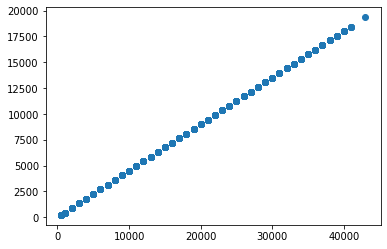

In [62]:
# plot a scatterplot
x = bank_reg_train[['Request Amount']]
y = bank_reg_train[['Interest']]
plt.plot(x,y,'o')

In [63]:
'''The plot demonstrate that there is a Positive correlation between the variables of 'Request Amount' and  'Interest'.  '''

"The plot demonstrate that there is a Positive correlation between the variables of 'Request Amount' and  'Interest'.  "

For the following exercises, work with the Framingham_training and the Framingham_test data sets. Reexpress Sex so that it is a flag variable with 0 for males and 1 for females. Use either Python or R to solve each problem.

45. Use the training set to run a regression predicting Age, based on Sex and Education. Obtain a summary of the model. Do both predictors belong in the model?

In [64]:
# import the data set
fram_train = pd.read_csv('Framingham_training')
fram_test = pd.read_csv('Framingham_test')

fram_train.shape, fram_test.shape

((7953, 5), (2257, 5))

In [65]:
# separate the predictor variables and the target variable and save into dataframe format
x_fram_train = pd.DataFrame(fram_train[['Sex', 'Educ']])
y_fram_train = pd.DataFrame(fram_train[['Age']])
# add a constant variable to our predictor variables
x_fram_train = sm.add_constant(x_fram_train)
#  run the multiple regression mode
model04 = sm.OLS(y_fram_train, x_fram_train).fit()
# obtain the results(summary) of the regression model
model04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     67.93
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           5.58e-30
Time:                        23:25:16   Log-Likelihood:                -29110.
No. Observations:                7953   AIC:                         5.823e+04
Df Residuals:                    7950   BIC:                         5.825e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.3600      0.408    138.025      0.000      55.560      57.160
Sex            0.4309      0.213      2.023      0.043       0.013       0.848
Educ          -1.1845      0.103    -11.446      0.000      -1.387      -0.982
==============================================================================
Omnibus:                      297.738   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.843
Skew:                           0.136   Prob(JB):                     4.78e-33
Kurtosis:                       2.387   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
'''Since the p value of both predoctor variables are less than 0.05, both predictors do belong in the model.'''

'Since the p value of both predoctor variables are less than 0.05, both predictors do belong in the model.'

46. Validate the model from the previous exercise.

In [67]:
# To verify the regression model results, we run the same code on the fram_test data set

# separate the predictor variables and the target variable and save into dataframe format
x_fram_ts = pd.DataFrame(fram_test[['Sex', 'Educ']])
y_fram_ts = pd.DataFrame(fram_test[['Age']])
# add a constant variable to our predictor variables
x_fram_ts = sm.add_constant(x_fram_ts)
#  run the multiple regression mode
model04_test = sm.OLS(y_fram_ts, x_fram_ts).fit()
# obtain the results(summary) of the regression model
model04_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     22.74
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.67e-10
Time:                        23:25:16   Log-Likelihood:                -8308.5
No. Observations:                2257   AIC:                         1.662e+04
Df Residuals:                    2254   BIC:                         1.664e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4202      0.784     70.690      0.000      53.883      56.958
Sex            1.0424      0.409      2.548      0.011       0.240       1.845
Educ          -1.1954      0.193     -6.199      0.000      -1.574      -0.817
==============================================================================
Omnibus:                       97.498   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.146
Skew:                           0.190   Prob(JB):                     7.83e-12
Kurtosis:                       2.368   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
'''The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'''

'The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'

47. Use the regression equation to complete this sentence: “The estimated Age equals....”

In [69]:
'''The estimated Age = 56.3600 + 0.4309*Sex + (-1.1845)*Educ '''

'The estimated Age = 56.3600 + 0.4309*Sex + (-1.1845)*Educ '

48. Interpret the coefficient for Sex.

In [70]:
'''The person who is Female (sex=1) tend to have a oldder age.'''

'The person who is Female (sex=1) tend to have a oldder age.'

49. Interpret the coefficient for Education.

In [71]:
'''The person who received higher education, tend to younger age.'''

'The person who received higher education, tend to younger age.'

50. Find and interpret the value of s.

In [72]:
# value of s = statistic s = standard error of the estimate = standard error of the regression
np.sqrt(model04.scale)

9.407791890220569

In [73]:
'''S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.
In this case the S value is 9.407791890220569, which tells us that the average distance of the data points from the fitted line is about 9.4% Age.'''


'S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.\nIn this case the S value is 9.407791890220569, which tells us that the average distance of the data points from the fitted line is about 9.4% Age.'

51. Find and interpret Radj .

In [74]:
'''The R2adj value is 0.019. 
R2adj represents the percentage variation in the dependent variable (Age) that is explained by the independent variables (Sex, Educ). 
The higher the R2adj value, the better the explainability of the model, with the highest value being one. 
In our case, the Radj value of 0.019 means that 1.9% of the variation in the variable 'Age' is explained by the variables 'Sex, Educ'.'''

"The R2adj value is 0.019. \nR2adj represents the percentage variation in the dependent variable (Age) that is explained by the independent variables (Sex, Educ). \nThe higher the R2adj value, the better the explainability of the model, with the highest value being one. \nIn our case, the Radj value of 0.019 means that 1.9% of the variation in the variable 'Age' is explained by the variables 'Sex, Educ'."

52. Find MAEBaseline and MAERegression, and determine whether the regression model
outperformed its baseline model.

In [75]:
# MAE Baseline = the MAE of prediction model(developed by test data set) over acutal value of the test data set 

# prepare the y values
y_pred_test_fram = model04_test.predict(x_fram_ts)
ytrue_test_fram = pd.DataFrame(fram_test[['Age']])
# obtain the MAE
MAE_Baseline = met.mean_absolute_error(y_true=ytrue_test_fram, y_pred=y_pred_test_fram)

# MAE Regression = the MAE of prediction model(developed by trainning data set) over actual value of the test data set
# prepare the y values
y_pred_fram = model04.predict(x_fram_ts)
# obtain the MAE
MAE_regression = met.mean_absolute_error(y_true=ytrue_test_fram, y_pred=y_pred_fram)

# compare the MAE Baseline VS. MAE Regression
MAE_regression - MAE_Baseline


0.004845203467790604

In [76]:
'''Since the value of Mean Absolute Error of regression model is bigger than the Mean Absolute Error of baseline, our regression model did not beat the baseline model. But the value difference is very low, so our regression is not much worse than Baseline model.'''


'Since the value of Mean Absolute Error of regression model is bigger than the Mean Absolute Error of baseline, our regression model did not beat the baseline model. But the value difference is very low, so our regression is not much worse than Baseline model.'

For the following exercises, work with the white_wine_training and the white_wine_test data sets. Use either Python or R to solve each problem.

53. Use the training set to run aregression predicting Quality,based on Alcohol and Sugar. Obtain a summary of the model. Do both predictors belong in the model?

In [77]:
# import the data set
ww_train = pd.read_csv('white_wine_training')
ww_test = pd.read_csv('white_wine_test')

In [78]:
# separate the predictor variables and the target variable and save into dataframe format
x_ww_train = pd.DataFrame(ww_train[['alcohol', 'sugar']])
y_ww_train = pd.DataFrame(ww_train[['quality']])
# add a constant variable to our predictor variables
x_ww_train = sm.add_constant(x_ww_train)
#  run the multiple regression mode
model05 = sm.OLS(y_ww_train, x_ww_train).fit()
# obtain the results(summary) of the regression model
model05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     291.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          2.85e-110
Time:                        23:25:16   Log-Likelihood:                -2066.0
No. Observations:                1809   AIC:                             4138.
Df Residuals:                    1806   BIC:                             4155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7458      0.181      9.648      0.000       1.391       2.101
alcohol        0.3776      0.016     23.544      0.000       0.346       0.409
sugar          0.0157      0.004      3.826      0.000       0.008       0.024
==============================================================================
Omnibus:                       35.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.069
Skew:                          -0.153   Prob(JB):                     1.49e-13
Kurtosis:                       3.831   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
'''Since the p value of both predoctor variables are less than 0.05, both predictors do belong in the model.'''

'Since the p value of both predoctor variables are less than 0.05, both predictors do belong in the model.'

54. Validate the model from the previous exercise.

In [80]:
# To verify the regression model results, we run the same code on the fram_test data set

# separate the predictor variables and the target variable and save into dataframe format
x_ww_ts = pd.DataFrame(ww_test[['alcohol', 'sugar']])
y_ww_ts = pd.DataFrame(ww_test[['quality']])
# add a constant variable to our predictor variables
x_ww_ts = sm.add_constant(x_ww_ts)
#  run the multiple regression mode
model05_test = sm.OLS(y_ww_ts, x_ww_ts).fit()
# obtain the results(summary) of the regression model
model05_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     224.8
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.15e-87
Time:                        23:25:16   Log-Likelihood:                -2126.8
No. Observations:                1760   AIC:                             4260.
Df Residuals:                    1757   BIC:                             4276.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0327      0.198     10.254      0.000       1.644       2.422
alcohol        0.3544      0.017     20.340      0.000       0.320       0.389
sugar          0.0158      0.004      3.569      0.000       0.007       0.025
==============================================================================
Omnibus:                       42.703   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.594
Skew:                          -0.066   Prob(JB):                     7.82e-21
Kurtosis:                       4.116   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
'''The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'''

'The summary() of the test set is smililar with the summary() of the trainning set. So the model is validated.'

55. Use the regression equation to complete this sentence: “The estimated Quality equals....”

In [82]:
'''The estimated Quality equals = 2.0327 + 0.3544*alcohol + 0.0158*sugar'''

'The estimated Quality equals = 2.0327 + 0.3544*alcohol + 0.0158*sugar'

56. Interpret the coefficient for Alcohol.

In [83]:
'''The higher the wine contains alcohol, the wine tend to have higher quality.'''

'The higher the wine contains alcohol, the wine tend to have higher quality.'

57. Interpret the coefficient for Sugar.

In [84]:
'''The higher the wine contains sugar, the wine tend to have a little bit higher quality'''

'The higher the wine contains sugar, the wine tend to have a little bit higher quality'

58. Find and interpret the value of s.

In [85]:
# value of s = statistic s = standard error of the estimate = standard error of the regression
np.sqrt(model05.scale)

0.7587901511398473

In [86]:
'''S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.
In this case the S value is 0.7587901511398473, which tells us that the average distance of the data points from the fitted line is about 0.75% qulity. This prediction model have pretty good predciton result.'''


'S value represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.\nIn this case the S value is 0.7587901511398473, which tells us that the average distance of the data points from the fitted line is about 0.75% qulity. This prediction model have pretty good predciton result.'

59. Find and interpret R2adj .

In [87]:
'''The R2adj value is 0.244. 
R2adj represents the percentage variation in the dependent variable (quality) that is explained by the independent variables (alcohol, sugar). 
The higher the R2adj value, the better the explainability of the model, with the highest value being one. 
In our case, the Radj value of 0.244 means that 0.244% of the variation in the variable 'quality' is explained by the variables 'alcohol, sugar'.'''


"The R2adj value is 0.244. \nR2adj represents the percentage variation in the dependent variable (quality) that is explained by the independent variables (alcohol, sugar). \nThe higher the R2adj value, the better the explainability of the model, with the highest value being one. \nIn our case, the Radj value of 0.244 means that 0.244% of the variation in the variable 'quality' is explained by the variables 'alcohol, sugar'."

60. Find MAE Baseline and MAE Regression, and determine whether the regression model outperformed its baseline model.

In [90]:
# MAE Baseline = the MAE of prediction model(developed by test data set) over acutal value of the test data set 

# prepare the y values
y_pred_test_ww = model05_test.predict(x_ww_ts)
ytrue_test_ww = pd.DataFrame(ww_test[['quality']])
# obtain the MAE
MAE_Baseline = met.mean_absolute_error(y_true=ytrue_test_ww, y_pred=y_pred_test_ww)

# MAE Regression = the MAE of prediction model(developed by trainning data set) over actual value of the test data set
# prepare the y values
y_pred_ww = model05.predict(x_ww_ts)
# obtain the MAE
MAE_regression = met.mean_absolute_error(y_true=ytrue_test_ww, y_pred=y_pred_ww)

# compare the MAE Baseline VS. MAE Regression
MAE_regression - MAE_Baseline


0.6367781971803833

In [89]:
'''Since the value of Mean Absolute Error of regression model is bigger than the Mean Absolute Error of baseline, our regression model did not beat the baseline model. But the value difference is very low, so our regression is not much worse than Baseline model.'''


'Since the value of Mean Absolute Error of regression model is bigger than the Mean Absolute Error of baseline, our regression model did not beat the baseline model. But the value difference is very low, so our regression is not much worse than Baseline model.'